# Выделение границ
Применим операторы и методы для обнаружения границ объекта на изображении.

![Кэнни](canny.gif)

Изображение: https://video.ittensive.com/machine-vision/barcode.example.png

### Подключение библиотек

In [1]:
%matplotlib inline
import numpy as np
import cv2
import os, os.path
import matplotlib.pyplot as plt

### Операторы Собеля
Выделяют градиенты. Горизонтальный:

|   |   |   |
| --- | --- | --- |
|1|0|-1|
|2|0|-2|
|1|0|-1|

Вертикальный:

|   |   |   |
| --- | --- | --- |
|1|2|1|
|0|0|0|
|-1|-2|-1|

In [2]:
def show_image (image):
    plt.figure(figsize=(16,8))
    plt.imshow(np.uint8(np.absolute(image)))
    plt.show()

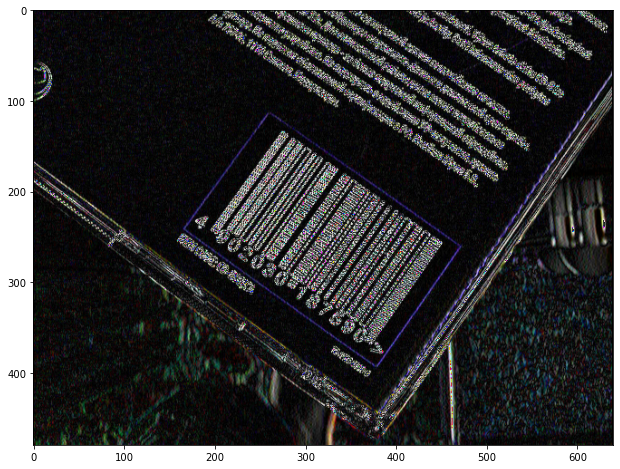

In [3]:
image = cv2.imread("barcode.example.png")
show_image(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3))

Оператор Щарра:

|   |   |   |
| --- | --- | --- |
|3|0|-3|
|10|0|-10|
|3|0|-3|

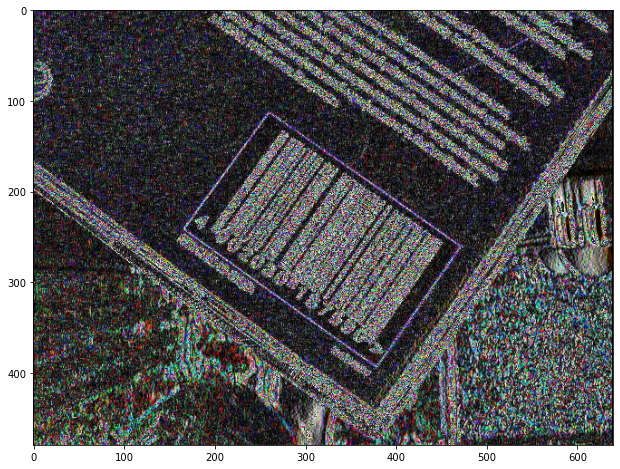

In [4]:
show_image(cv2.Scharr(image, cv2.CV_64F, 1, 0))

### Размытие изображения + границы
Открытие + Медианное размытие + Щарр

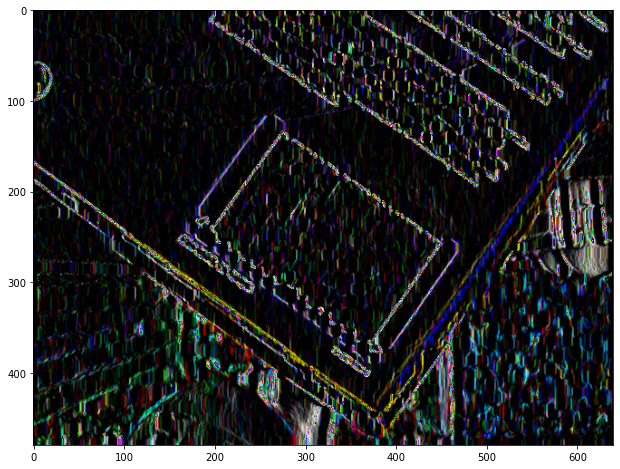

In [5]:
image_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, np.ones((3,3)), iterations = 5)
image_median = cv2.medianBlur(image_open, 3)
show_image(cv2.Scharr(image_median, cv2.CV_64F, 1, 0))

### Удаление шума
Преобразование к серой палитре + порог яркости по гистограмме (метод Оцу)

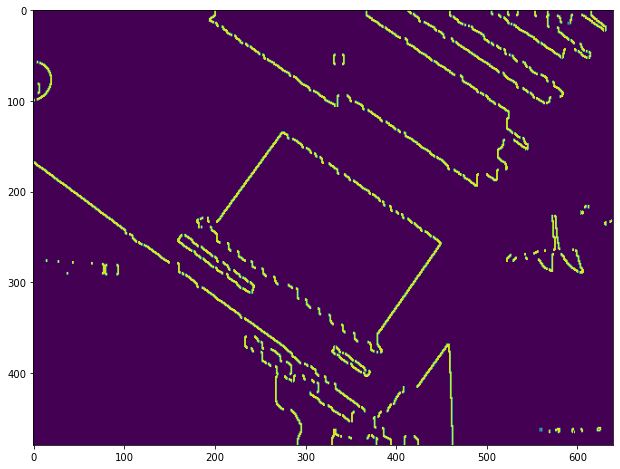

In [6]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
otsu, image_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
image_open = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, np.ones((3,3)), iterations = 5)
image_median = cv2.medianBlur(image_open, 3)
show_image(cv2.Scharr(image_median, cv2.CV_64F, 1, 0))

### Канни
1. Сглаживание. Размытие изображения для удаления шума.
2. Поиск градиентов. Границы отмечаются там, где градиент изображения приобретает максимальное значение.
3. Подавление не-максимумов. Только локальные максимумы отмечаются как границы.
4. Двойная пороговая фильтрация. Потенциальные границы определяются порогами.
5. Трассировка области неоднозначности. Итоговые границы определяются путём подавления всех краёв, не связанных с определенными (сильными) границами.

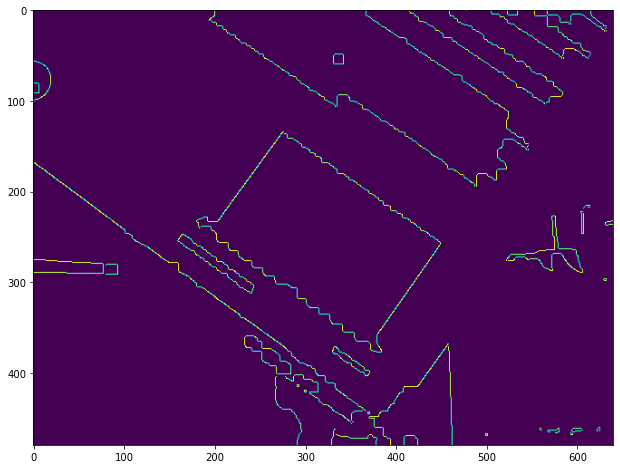

In [7]:
image_canny = cv2.Canny(image_open, otsu/2, otsu)
show_image(image_canny)